In [1]:
from numpy import arange,diff
from math import log10 as log
from math import sqrt as raiz
import matplotlib.pyplot as plt
#plt.rcParams["figure.figsize"] = [10,7]

# Ácido-base  monoprótico

## Ácido-base forte

In [2]:
def tit_a(vtit):
    '''Curva de titulação ácida'''
    Ca=0.05 #definindo as constantes
    Cb=0.1
    V0=50
    Kw=1e-14
    b=-(Ca*V0-Cb*vtit)/(vtit+V0)
    H=(-b+raiz(b**2+4*Kw))/2
    return round(-log(H),2)

tit_a(25)

7.0

Text(0.5, 1.0, 'Curva de titulação de um ácido forte por uma base forte')

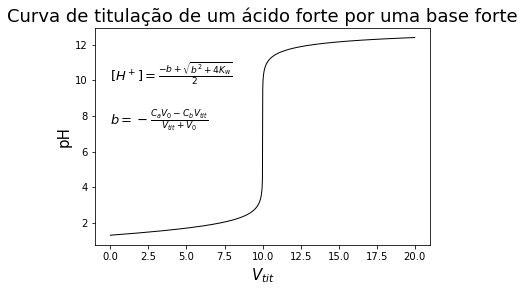

In [3]:
def curva():
    Ca=0.05 #definindo as constantes
    Cb=0.1
    V0=20
    Kw=1e-14
    pH,Vtit=[],[] #criando as listas com valores de Vtit e pH
    for vtit in arange(0,20,0.01): #calculando o pH para cada Vtit
        Vtit.append(vtit)
        b=-(Ca*V0-Cb*vtit)/(vtit+V0)
        H=(-b+raiz(b**2+4*Kw))/2
        pH.append(-log(H))
    return pH,Vtit

#plotando e salvando
pH,Vtit=curva()
plt.plot(Vtit,pH,linewidth=1,color='black')
plt.annotate('$[H^+]=\\frac{-b+\sqrt{b^2+4K_w}}{2}$',xy=(0,10),size=13)
plt.annotate('$b=-\\frac{C_a V_{0}-C_b V_{tit}}{V_{tit}+V_0}$',xy=(0,7.5),size=13)
plt.xlabel('$V_{tit}$',size=15)
plt.ylabel('pH',size=15)
plt.title('Curva de titulação de um ácido forte por uma base forte',size=18)
#plt.savefig('Curva de Titulação',dpi=300,format='jpeg')

Text(0.5, 1.0, 'Curva de titulação de uma base forte por um ácido forte')

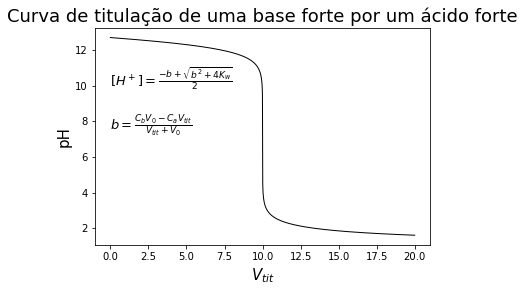

In [4]:
def curva():
    Ca=0.1 #definindo as constantes
    Cb=0.05
    V0=20
    Kw=1e-14
    pH,Vtit=[],[] #criando as listas com valores de Vtit e pH
    for vtit in arange(0,20,0.01): #calculando o pH para cada Vtit
        Vtit.append(vtit)
        b=(Cb*V0-Ca*vtit)/(vtit+V0)
        H=(-b+raiz(b**2+4*Kw))/2
        pH.append(-log(H))
    return pH,Vtit

#plotando e salvando
pH,Vtit=curva()
plt.plot(Vtit,pH,linewidth=1,color='black')
plt.annotate('$[H^+]=\\frac{-b+\sqrt{b^2+4K_w}}{2}$',xy=(0,10),size=13)
plt.annotate('$b=\\frac{C_b V_{0}-C_a V_{tit}}{V_{tit}+V_0}$',xy=(0,7.5),size=13)
plt.xlabel('$V_{tit}$',size=15)
plt.ylabel('pH',size=15)
plt.title('Curva de titulação de uma base forte por um ácido forte',size=18)
#plt.savefig('Curva de Titulação Base ',dpi=300,format='jpeg')

## Ácido-base fraco

In [5]:
#definindo o método numérico para achar raiz 

def sinal(x):
    '''Função sinal. Retorna -1 se x<0, 0 se x=0 e 1 se x>0.'''
    if x>0:
        return 1.0
    elif x<0:
        return -1.0
    else:
        return 0.0

    
def raizbs(f,a,b):
    '''Método da bisseção para achar a raíz da função f no intervalo [a, b].
    Faz a bisseção até que |x2-x1|<=epsilon.'''
    epsilon=(b-a)/10000
    x1=a
    f1=f(x1)
    if f1==0.0:
        return x1
    x2=b
    f2=f(x2)
    if f2==0.0:
        return x2
    while abs(x2-x1)>=epsilon:
        x3=(x1+x2)/2
        f3=f(x3)
        if sinal(f2)!=sinal(f3):
            x1=x3
            f1=f3
        else:
            x2=x3
            f2=f3
    media=(x1+x2)/2
    return media

In [6]:
def pH(Va):
    Ca=0.01 #definindo as constantes
    Cb=0.0150
    Vb=25
    Kw=1e-14
    Ka=2.3e-11
    def pHH(ph):
        H=10**(-ph)
        OH=Kw/H
        alpha_bh=H/(H+Ka)
        return H+alpha_bh*((Cb*Vb)/(Va+Vb))-((Ca*Va)/(Va+Vb))-OH
        
    return raizbs(pHH,-log(Ca),14)

In [7]:
#achando o PE
Ca=0.01 #definindo as constantes
Cb=0.0150
Vb=25
(Cb*Vb)/Ca

37.5

In [8]:
print('Antes = '+str(round(pH(37.5-0.05),2)))
print('No PE = '+str(round(pH(37.5),2)))
print('Depois = '+str(round(pH(37.5+0.05),2)))

Antes = 7.73
No PE = 6.41
Depois = 5.1


Text(0.5, 1.0, 'Curva de titulação da etilamina')

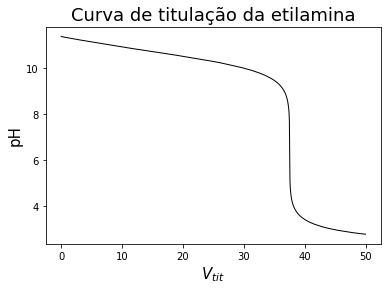

In [9]:
ph,Vtit=[],[]
for vtit in arange(0,50,0.05):
    Vtit.append(vtit)
    ph.append(pH(vtit))

plt.plot(Vtit,ph,linewidth=1,color='black')
plt.xlabel('$V_{tit}$',size=15)
plt.ylabel('pH',size=15)
plt.title('Curva de titulação da etilamina',size=18)

In [10]:
dif=list(diff(ph,prepend=ph[0])/diff(Vtit,prepend=Vtit[1]))
print('V_eq =',Vtit[dif.index(min(dif))])

V_eq = 37.5


Text(0.5, 0, '$V_{tit}$')

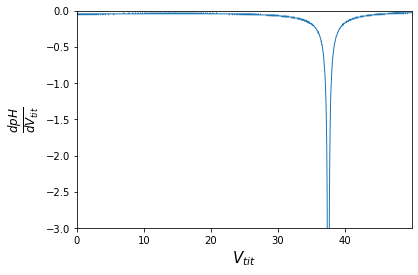

In [11]:
plt.plot(Vtit,dif,linewidth=1)
plt.margins(0)
plt.ylim(-3,0)
plt.ylabel('$\\frac{dpH}{dV_{tit}}$',size=17)
plt.xlabel('$V_{tit}$',size=15)

# Ácido-base diprótico

## Método numérico para achar o pH

In [12]:
#definindo a função para achar o Vtit para cada pH

def pH(Vtit):
    Ca=0.1 #definindo as constantes
    Cb=0.1
    V0=10
    Ka1=10**(-3.6)
    Ka2=10**(-6.3)
    Kw=1e-14
    def pHH(ph):
        H=10**(-ph)
        OH=Kw/H
        alpha_ha=(H*Ka1)/(H**2+Ka1*H+Ka1*Ka2) #definindo os alphas
        alpha_a2=(Ka1*Ka2)/(H**2+Ka1*H+Ka1*Ka2)
        return Vtit-(V0*(Ca*(alpha_ha+2*alpha_a2)+OH-H))/(H-OH+Cb) #coração
        
    return raizbs(pHH,0,14+log(Cb))

In [13]:
round(pH(10),2)

4.95

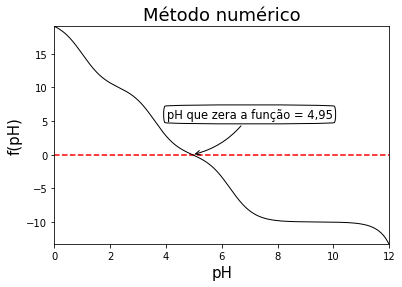

In [14]:
#vendo como o método numérico se comporta 

Ca=0.1 #definindo as constantes
Cb=0.1
V0=10
Ka1=10**(-3.6)
Ka2=10**(-6.3)
Kw=1e-14
Vtit=10
def pHH(ph):
    H=10**(-ph)
    OH=Kw/H
    alpha_ha=(H*Ka1)/(H**2+Ka1*H+Ka1*Ka2) #definindo os alphas
    alpha_a2=(Ka1*Ka2)/(H**2+Ka1*H+Ka1*Ka2)
    return Vtit-(V0*(Ca*(alpha_ha+2*alpha_a2)+OH-H))/(H-OH+Cb) #coração

x,y=[],[]
for i in arange(0,12,0.01):
    x.append(i)
    y.append(pHH(i))

plt.annotate("pH que zera a função = 4,95",
                  xy=(4.95, 0), xycoords='data',
                  xytext=(7,6), textcoords='data',
                  size=11.5, va="center", ha="center",
                  bbox=dict(boxstyle="round4", fc="w"),
                  arrowprops=dict(arrowstyle="->",
                                  connectionstyle="arc3,rad=-0.2",
                                  fc="w"),
                  )
plt.hlines(0,0,12,linestyles='dashed',color='red')
plt.title('Método numérico',size=18)
plt.xlabel('pH',size=15)
plt.ylabel('f(pH)',size=15)
plt.margins(0)
plt.plot(x,y,linewidth=1,color='black')

Text(0.5, 1.0, 'Curva de titulação do ácido carbônico')

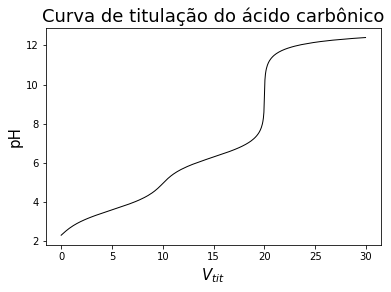

In [15]:
ph,Vtit=[],[]
for vtit in arange(0,30,0.05):
    Vtit.append(vtit)
    ph.append(pH(vtit))

plt.plot(Vtit,ph,linewidth=1,color='black')
plt.xlabel('$V_{tit}$',size=15)
plt.ylabel('pH',size=15)
plt.title('Curva de titulação do ácido carbônico',size=18)

Text(0.5, 0, '$V_{tit}$')

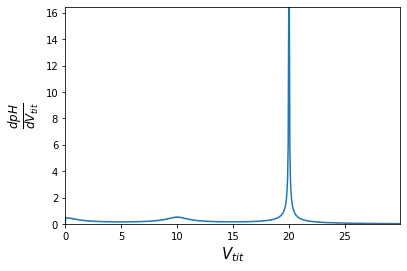

In [16]:
plt.plot(Vtit,diff(ph,prepend=ph[0])/diff(Vtit,prepend=Vtit[1]))
plt.margins(0)
plt.ylabel('$\\frac{dpH}{dV_{tit}}$',size=17)
plt.xlabel('$V_{tit}$',size=15)

## Fazendo o Vtit de forma analítica

Text(0.5, 1.0, 'Curva de titulação do ácido carbônico')

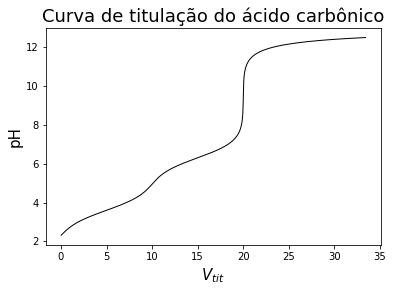

In [17]:
def curva():
    Ca=0.1 #definindo as constantes
    Cb=0.1
    V0=10
    Ka1=10**(-3.6)
    Ka2=10**(-6.3)
    Kw=1e-14
    pH,Vtit=[],[] #criando a lista de pH e Vtit
    for ph in arange(2.32,12.5,0.01): #cuidado com o pH (tem que pegar a faixa certa)
        H=10**(-ph)
        OH=Kw/H
        alpha_ha=(H*Ka1)/(H**2+Ka1*H+Ka1*Ka2) #definindo os alphas
        alpha_a2=(Ka1*Ka2)/(H**2+Ka1*H+Ka1*Ka2)
        vtit=(V0*(Ca*(alpha_ha+2*alpha_a2)+OH-H))/(H-OH+Cb) #coração
        Vtit.append(vtit)
        pH.append(ph)
    return pH,Vtit

        #plotando o gráfico
pH,Vtit=curva()
plt.plot(Vtit,pH,linewidth=1,color='black')
plt.xlabel('$V_{tit}$',size=15)
plt.ylabel('pH',size=15)
plt.title('Curva de titulação do ácido carbônico',size=18)

(0.0, 5.0)

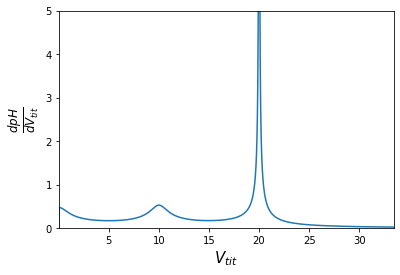

In [18]:
plt.plot(Vtit,diff(pH,prepend=pH[0])/diff(Vtit,prepend=Vtit[1]))
plt.margins(0)
plt.ylabel('$\\frac{dpH}{dV_{tit}}$',size=17)
plt.xlabel('$V_{tit}$',size=15)
plt.ylim(0,5)

# Ácido tiprótico

## Forma numérica para o pH

In [19]:
def pH(vtit):
    Ca=0.047286 #definindo as constantes
    Cb=0.111
    V0=50
    Ka1=10**(-2.16)
    Ka2=10**(-7.21)
    Ka3=10**(-12.32)
    Kw=1e-14
    def pHH(ph):
        H=10**(-ph)
        OH=Kw/H
        alpha_h2a= (Ka1*H**2)/(H**3+Ka1*H**2+Ka1*Ka2*H+Ka1*Ka2*Ka3)#definindo os alphas
        alpha_ha=(Ka1*Ka2*H)/(H**3+Ka1*H**2+Ka1*Ka2*H+Ka1*Ka2*Ka3)
        alpha_a= (Ka1*Ka2*Ka3)/(H**3+Ka1*H**2+Ka1*Ka2*H+Ka1*Ka2*Ka3)
        return vtit-(V0*(Ca*(alpha_h2a+2*alpha_ha+3*alpha_a)+OH-H))/(H-OH+Cb) #coração
        
    return raizbs(pHH,0,14+log(Cb))

In [20]:
round(pH(0),2)

1.83

Text(0.5, 1.0, 'Curva de titulação do ácido fosfórico')

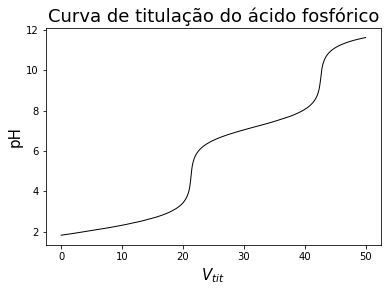

In [21]:
ph,vtit=[],[]
for Vtit in arange(0,50,0.05):
    vtit.append(Vtit)
    ph.append(pH(Vtit))

#plotando o gráfico
plt.plot(vtit,ph,linewidth=1,color='black')
plt.xlabel('$V_{tit}$',size=15)
plt.ylabel('pH',size=15)
plt.title('Curva de titulação do ácido fosfórico',size=18)

## Forma analítica para o Vtit

Text(0.5, 1.0, 'Curva de titulação do ácido fosfórico')

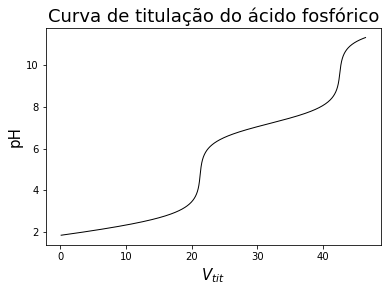

In [22]:
def curva():
    Ca=0.047286 #definindo as constantes
    Cb=0.111
    V0=50
    Ka1=10**(-2.16)
    Ka2=10**(-7.21)
    Ka3=10**(-12.32)
    Kw=1e-14
    pH,Vtit=[],[] #criando a lista de pH e Vtit
    for ph in arange(1.83,11.35,0.01): #cuidado com o pH (tem que pegar a faixa certa)
        H=10**(-ph)
        OH=Kw/H
        alpha_h2a= (Ka1*H**2)/(H**3+Ka1*H**2+Ka1*Ka2*H+Ka1*Ka2*Ka3)#definindo os alphas
        alpha_ha=(Ka1*Ka2*H)/(H**3+Ka1*H**2+Ka1*Ka2*H+Ka1*Ka2*Ka3)
        alpha_a= (Ka1*Ka2*Ka3)/(H**3+Ka1*H**2+Ka1*Ka2*H+Ka1*Ka2*Ka3)
        vtit=(V0*(Ca*(alpha_h2a+2*alpha_ha+3*alpha_a)+OH-H))/(H-OH+Cb) #coração
        Vtit.append(vtit)
        pH.append(ph)
    return pH,Vtit

#plotando o gráfico
pH,Vtit=curva()
plt.plot(Vtit,pH,linewidth=1,color='black')
plt.xlabel('$V_{tit}$',size=15)
plt.ylabel('pH',size=15)
plt.title('Curva de titulação do ácido fosfórico',size=18)